# Evaluating a logistic regression

We've been running willy-nilly doing logistic regresions in these past few sections, but we haven't taken the chance to sit down and think **are they even of acceptable quality?**

In this section we'll discuss what makes a logistic regression worthwhile, along with how to analyze all the features you've selected.

<p class="reading-options">
  <a class="btn" href="/regression/evaluating-logistic-regressions">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/regression/notebooks/Evaluating Logistic Regressions.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="#">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

## Our dataset

We're going to use the updated scarf-making dataset from [our last section](/regression/logistic-regression-part-two/). We're cool, we're crafty, but we're also not very good at finishing scarves we've set out to knit!

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df = pd.DataFrame([
    { 'length_in': 55, 'large_gauge': 1, 'color': 'orange', 'completed': 1 },
    { 'length_in': 55, 'large_gauge': 0, 'color': 'orange', 'completed': 1 },
    { 'length_in': 55, 'large_gauge': 0, 'color': 'brown', 'completed': 1 },
    { 'length_in': 60, 'large_gauge': 0, 'color': 'brown', 'completed': 1 },
    { 'length_in': 60, 'large_gauge': 0, 'color': 'grey', 'completed': 0 },
    { 'length_in': 70, 'large_gauge': 0, 'color': 'grey', 'completed': 1 },
    { 'length_in': 70, 'large_gauge': 0, 'color': 'orange', 'completed': 0 },
    { 'length_in': 82, 'large_gauge': 1, 'color': 'grey', 'completed': 1 },
    { 'length_in': 82, 'large_gauge': 0, 'color': 'brown', 'completed': 0 },
    { 'length_in': 82, 'large_gauge': 0, 'color': 'orange', 'completed': 0 },
    { 'length_in': 82, 'large_gauge': 1, 'color': 'brown', 'completed': 0 },
])
df

,length_in,large_gauge,color,completed
0,55,1,orange,1
1,55,0,orange,1
2,55,0,brown,1
3,60,0,brown,1
4,60,0,grey,0
5,70,0,grey,1
6,70,0,orange,0
7,82,1,grey,1
8,82,0,brown,0
9,82,0,orange,0


Now let's ask some questions about it.

## Statistical significance

Just because you run a regression **doesn't mean the results are true!** The standard way of judging whether you can trust what a regression is telling you is called the **p-value**. Let's take a look at our most recent regression, and figure out where the p-value is and what it means.

In [3]:
model = smf.logit("completed ~ length_in + large_gauge + C(color, Treatment('orange'))", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.424906
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Dec 2019   Pseudo R-squ.:                  0.3833
Time:                        14:03:52   Log-Likelihood:                -4.6740
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                    0.2138
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 12.1245      8.094      1.498      0.134      -3.740      27.989
C(color, Treatment('orange'))[T.brown]     0.4594      2.257      0.204      0.839      -3.965       4.884
C(color, Treatment('orange'))[T.grey]      1.4708      2.289      0.643      0.520      -3.015       5.957
length_in                                 -0.1944      0.126     -1.540      0.124      -0.442       0.053
large_gauge                                2.8814      2.845      1.013      0.311      -2.694       8.457
==========================================================================================================
"""

This is our logistic regression on scarf completion: given a scarf's intended length, color, and the size of our needles, can we finish it? Instead of looking at the coefficients and odds ratios, let's **peek at the regression's p value.**

The p value is listed as **LLR p-value** (bottom of the top right area), and it's the certainty we can have in our results. You can think of it as the percent chance that the regression can create a meaningful representation of us completing a scarf.

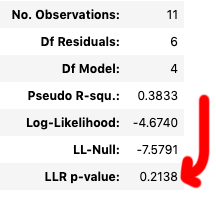

Typically a p value of 0.05 (or 5%) is thought of as "good" or "statistically significant," as there's only a 5% or less chance that these results aren't valid. **Our p-value is 0.2138, which is frankly _terrible._** I don't think we can use this regression for anything!

### p-values for features

Beyond p values for the entire regression, you can also find p-values for each individual feature. They're listed under `P>|z|` down in the bottom features section.

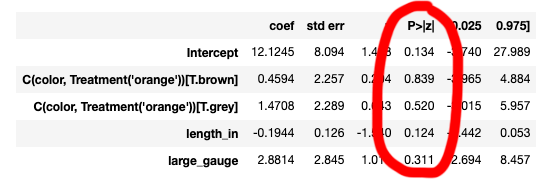

Notice that the p values for brown is at the nightmarish level of above 80%! Grey is also incredibly high, at around 0.5 (not to be confused with *0.05*).

Honestly, **we probably shouldn't have added those in the first place.** You should only be adding features when you have an argument as to why they'd affect the outcome. Bad features have a tendency to not only ruin your entire regression's p value, they also screw around with features that are actually valid and good!

Let's remove the color category from our regression and try again.

In [4]:
model = smf.logit("completed ~ length_in + large_gauge", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.449028
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              completed   No. Observations:                   11
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            2
Date:                Mon, 30 Dec 2019   Pseudo R-squ.:                  0.3483
Time:                        14:03:52   Log-Likelihood:                -4.9393
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                   0.07138
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.0850      7.615      1.587      0.113      -2.840      27.010
length_in      -0.1833      0.117     -1.573      0.116      -0.412       0.045
large_gauge     2.9609      2.589      1.144      0.253      -2.113       8.035
===============================================================================
"""

Our regression's overall p value at 0.07 is now looking a lot closer to statistical significane. Removing unnecessary features improved our regression's chance of being meaningful - **more features isn't always better!**

## Model quality

When we're looking at a linear regression, we spend a lot of time on **R-squared** values. In logistic regression, we don't have R-squared, but we _kind of_ do. They're called (somewhat appropriately) **pseudo R-squared** values.

Pseudo R-squared is listed as **Pseudo R-sq.** up top.

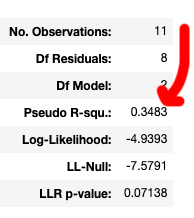

Your pseudo R-squared is on a scale from 0 to 1, with higher values meaning a better fit. Unlike linear regression's R-squared, though, **you can't use it to say "we're explaining such-and-such of the variation."** You can only use it to say "this model is better than that model."

Let's compare the pseudo R-squared value from our `length_in + large_gauge` regression to the `length_in + large_gauge + color` regression.

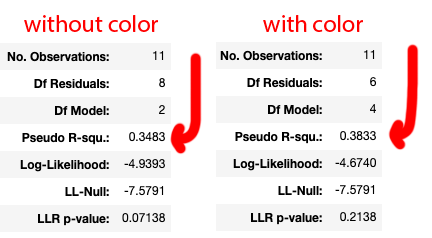

It looks like the more complicated regression wins!  Does that mean we run back to the regression that includes color, crying and apologizing for casting it aside?

Not even for a moment! **Because the color-including regression's p-value is so high - over 0.2 - we definitely shouldn't take it seriously.** We should only listen to a regression or a coefficient if its p-value is in a respectable place (generally speaking, under  0.05).

> **Note:** Our p-values are generally going to be terrible because we have small datasets that involved me semi-randomly typing numbers. There isn't a secret trick where we're going to hit that 0.05 threshold and solve all our knitting problems forever, sorry.

### Pseudo R-squareds

Let's have a little chat about logistic regression pseudo R-squareds for a quick second. It turns out there are actually _multiple versions of pseudo R-squared for logistic regression_. Literally different calculations that give different numbers, all called pseudo R-squared! It's a lot more complicated than linear regression, I guess.

The pseudo R-squared one we're using here is called **McFadden's R-squared**. Other pieces of statistical modeling software use [difference calculations](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/)! I'm calling out both the complicated nature of determining "goodness of fit" and logistic regression R-squared measurements because it leads to great blog posts [like this one](https://statisticalhorizons.com/r2logistic):

> For years, I’ve been recommending the Cox and Snell R2 over the McFadden R2, but I’ve recently concluded that that was a mistake. I now believe that McFadden’s R2 is a better choice. However, I’ve also learned about another R2 that has good properties, a lot of intuitive appeal, and is easily calculated. At the moment, I like it better than the McFadden R2. But I’m not going to make a definite recommendation until I get more experience with it.

First off, _it's a secret, he's keeping his favorite R-squared technique a secret!!!_ I love that _so much_.

Second, I probably understand about as much of that as you do, but here's the point: non-math people often think that numbers automatically make things true or false, that there's exactly one way to do things, and that math can give you definitive answers. **This is rarely true, especially when we're talking about real-life data!**

The uncertainty in numbers is a big reason why even if you know enough stats to get by, **you should always be running your analyses by someone who knows more**, or someone who is a domain expert. And even the experts don't always agree with one another! On top of that, **readers really trust numbers,** and you need to go above and beyond to make sure you're explaining them correctly.

## Review

In this section, we talked about **evaluating logistic regression models and features.**

Unlike judging the quality of a linear regression, we don't have an **R-squared** to explain goodness of fit. Instead we only have a **pseudo R-squared**. Like in linear regression, we can use pseudo R-squared to compare two different regressions. Higher is better!

The most important measure in your regression is going to be your **p value**, which is used to measure **statistical significance** (aka the chance your data is a happy accident, not actually meaningful). Traditionally 0.05 is the cutoff, which means there's a less than 5% chance that your findings were made by chance.

Whether your regression does or does not hit the p-value threshold, you can also examine the **p values of your features**. Removing features with high p values tends to improve your regression, as your regression no longer needs to pay attention to the noise they add.

## Discussion topics

> TODO
>
> there’s literally nothing you can do right in stats
>
> which also means there’s no wrong way to do them